In [ ]:
import pandas as pd

df = pd.read_csv('/content/customer_shopping_data.csv')

df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [ ]:
# explore

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [ ]:
# 4. Group the sales data by region and calculate the total sales amount for each region.
# region - shopping_mall and Sales Amount - price

region_sales = df.groupby('shopping_mall')['price'].sum().reset_index() # reset_index se serial numbers aate hai

region_sales

,shopping_mall,price
0,Cevahir AVM,3433671.84
1,Emaar Square Mall,3390408.31
2,Forum Istanbul,3336073.82
3,Istinye Park,6717077.54
4,Kanyon,13710755.24
5,Mall of Istanbul,13851737.62
6,Metrocity,10249980.07
7,Metropol AVM,6937992.99
8,Viaport Outlet,3414019.46
9,Zorlu Center,3509649.02


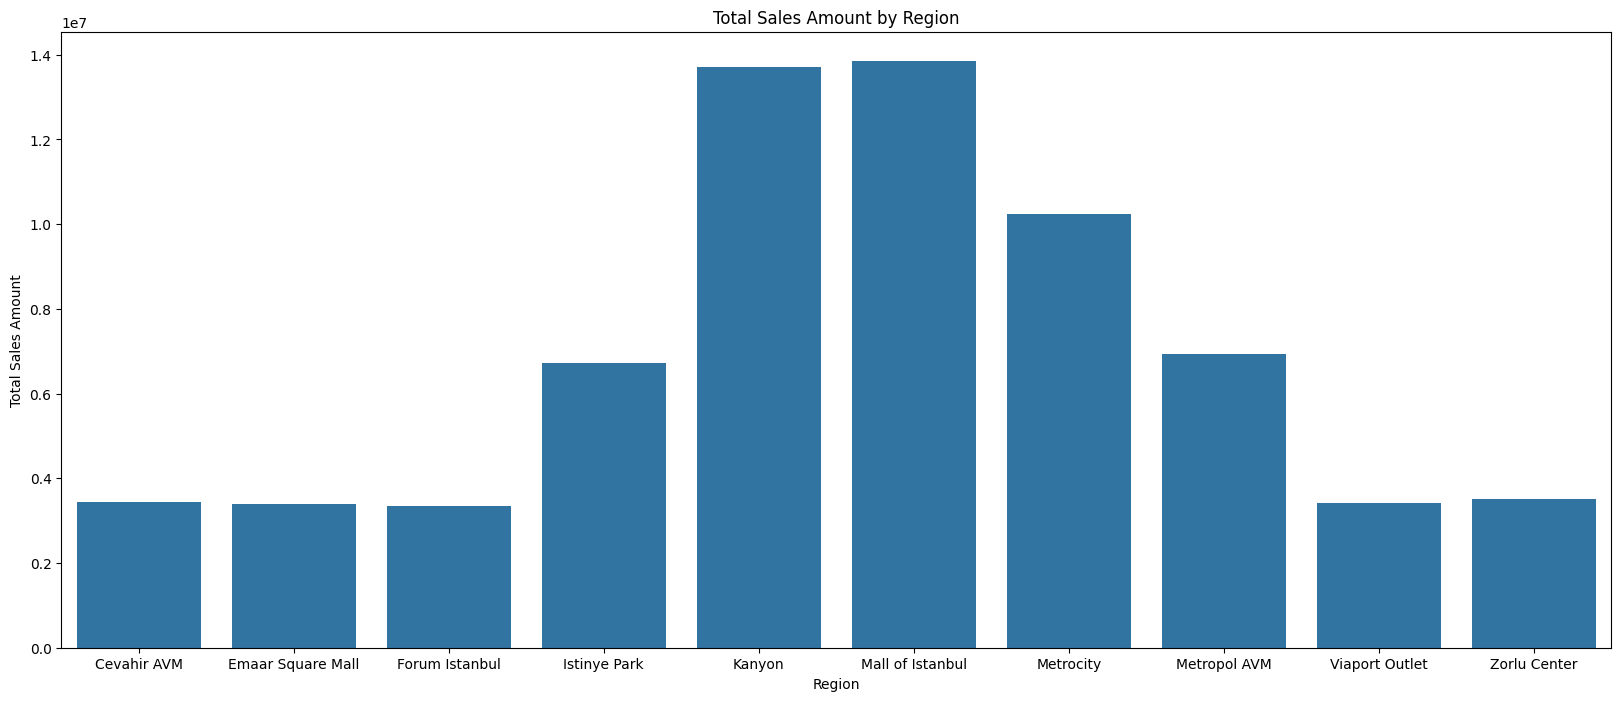

In [ ]:
# 5. Create bar plots or pie charts to visualize the sales distribution by region.
# region - shopping_mall and Sales - price

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))
sns.barplot(x='shopping_mall', y='price', data=region_sales)
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Region')
plt.show()

In [ ]:
# 6. Identify the top-performing regions based on the highest sales amount

top_regions = region_sales.sort_values(by='price', ascending=False).head(5)

top_regions

,shopping_mall,price
5,Mall of Istanbul,13851737.62
4,Kanyon,13710755.24
6,Metrocity,10249980.07
7,Metropol AVM,6937992.99
3,Istinye Park,6717077.54


In [ ]:
# 7. Group the sales data by region and product category to calculate the total sales amount for each combination
# region - shopping_mall

region_category_sales = df.groupby(['shopping_mall', 'category'])['price'].sum().reset_index()

region_category_sales

,shopping_mall,category,price
0,Cevahir AVM,Books,11998.80
1,Cevahir AVM,Clothing,1554414.40
2,Cevahir AVM,Cosmetics,88394.84
3,Cevahir AVM,Food & Beverage,11992.39
4,Cevahir AVM,Shoes,884050.41
...,...,...,...
75,Zorlu Center,Food & Beverage,11589.68
76,Zorlu Center,Shoes,953670.13
77,Zorlu Center,Souvenir,8398.68
78,Zorlu Center,Technology,803250.00


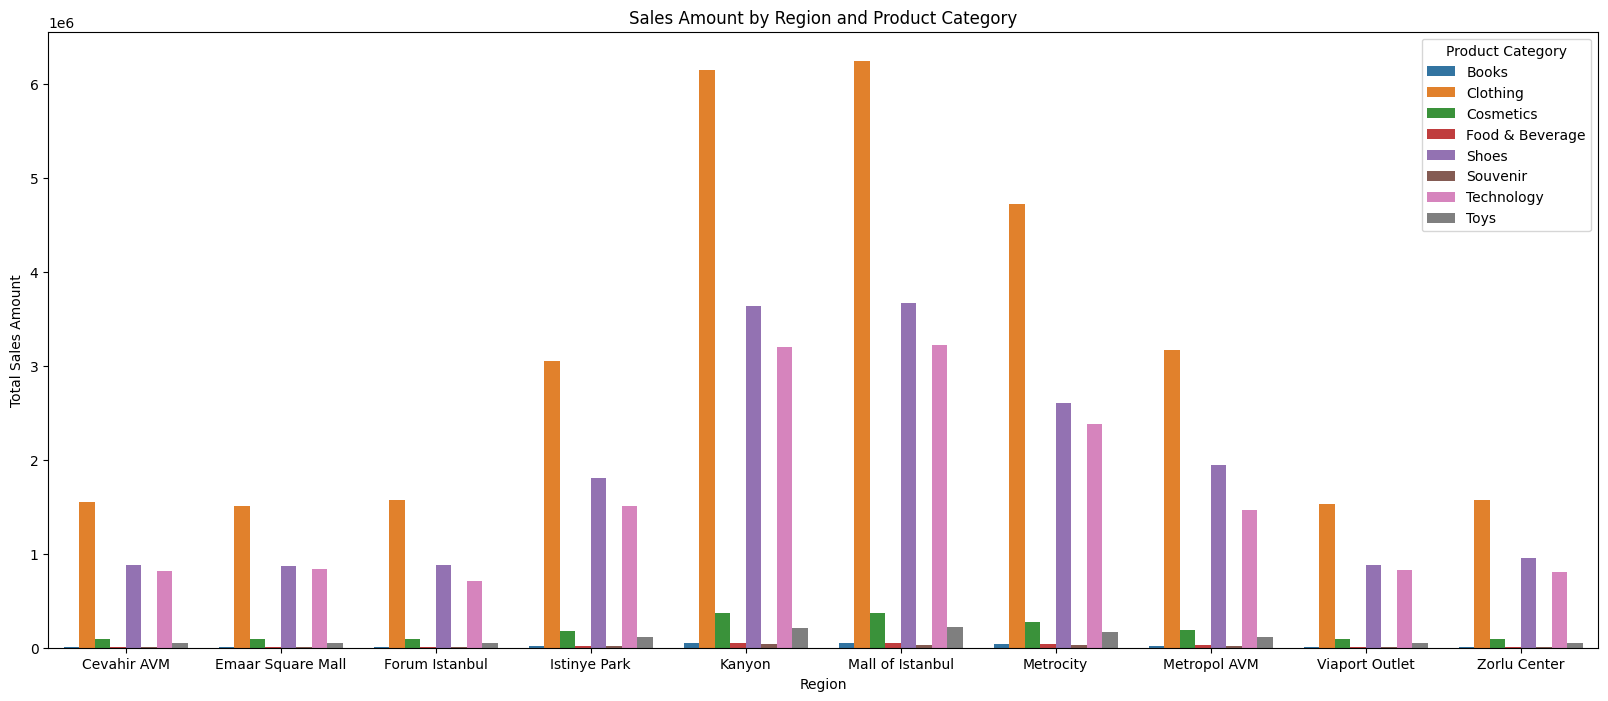

In [ ]:
# 8. Create stacked bar plots or grouped bar plots to compare the sales amounts across different regions and product categories.
# region - shopping_mall

plt.figure(figsize=(20, 8))
sns.barplot(x='shopping_mall', y='price', hue='category', data=region_category_sales)
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Amount by Region and Product Category')
plt.legend(title='Product Category')
plt.show()

# hue parameter is used to add a third categorical variable to your plot, which allows for a breakdown within each category of the main variables specified on the x and y axes
